# Mission Dotlas 🌎 (40 points)

![Dotlas](https://camo.githubusercontent.com/6a3a3a9e55ce6b5c4305badbdc68c0d5f11b360b11e3fa7b93c822d637166090/68747470733a2f2f646f746c61732d776562736974652e73332e65752d776573742d312e616d617a6f6e6177732e636f6d2f696d616765732f6769746875622f62616e6e65722e706e67)

### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

CELL_HEIGHT: int = 50

# Initialize helpers to ignore pandas warnings and resize columns and cells
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [3]:
%%time
## reading dataset from url and storing it in local system
df = pd.read_json(DATA_URL)
df.to_json('daltos.json')

CPU times: total: 29.2 s
Wall time: 3min 46s


In [4]:
## reading the dataset 
df = pd.read_json('daltos.json')

Create a restaurant ID column to uniquely index each restaurant

In [5]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.097510,-118.335921,Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...","{'cleanMenus': None, 'limitedSeating': None, '...",None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],34.154596,-118.448700,Sherman Oaks,None,"[{'name': 'Sample Menu', 'sections': [{'name':...",<p>Feast on delicious grub at Jerry's Famous D...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...","{'cleanMenus': None, 'limitedSeating': None, '...",None,None,None,[],NaN,2


## 2.2 Basic Operations

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [6]:
df1 = pd.DataFrame()
df1['restaurant_count'] = df.groupby(df['city']).count()['restaurant_id']
df1['avg_rating'] = df.groupby(df['city']).mean()['rating']
df1['avg_price_range_id'] = df.groupby(df['city']).mean()['price_range_id']
df1['avg_reservation_advance'] = df.groupby(df['city']).mean()['maximum_days_advance_for_reservation']
df1 = df1.reset_index()
df1.sort_values(by=['restaurant_count'],ascending=False).head(5)

,city,restaurant_count,avg_rating,avg_price_range_id,avg_reservation_advance
589,San Francisco,1645,2.593435,2.361702,90.345289
372,Los Angeles,1604,2.319950,2.290524,86.692020
586,San Diego,1034,2.654932,2.287234,94.578337
592,San Jose,372,1.545968,2.163978,88.301075
578,Sacramento,329,1.686626,2.267477,95.027356


#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [7]:
df1 = pd.DataFrame()
df1['restaurant_count'] = df.groupby(df['brand_name']).count()['restaurant_id']
df1['avg_price_range_id'] = df.groupby(df['brand_name']).mean()['price_range_id']
df1 = df1.reset_index()
df1.sort_values(by=['restaurant_count'],ascending=False).head(5)

,brand_name,restaurant_count,avg_price_range_id
4211,Denny's,73,2.0
6836,Ihop,37,2.0
2165,Buffalo Wild Wings,32,2.0
1679,Black Bear Diner,28,2.0
3677,Coco's Bakery Restaurant,24,2.0


#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, "Ruby's Diner"),
  Text(1, 0, 'Crepevine'),
  Text(2, 0, "Amici's East Coast Pizzeria"),
  Text(3, 0, 'Urban Plates'),
  Text(4, 0, 'Mikuni Japanese Restaurant & Sushi Bar')])

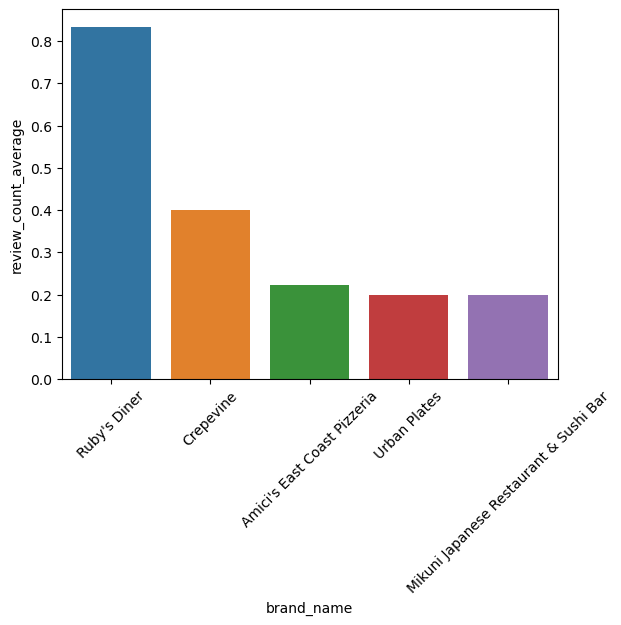

In [8]:
import seaborn as sns 
df1 = (df.groupby(df['brand_name']).count()['restaurant_id']).reset_index()
l1 = list((df1['brand_name'][df1['restaurant_id'] >= 5]).values)
l1 # list of brand names where restaurant id is greater than 5 

series = df.groupby(df['brand_name']).mean()['review_count'].sort_values(ascending=False)

list1 = []
list2 = []
for i,j in enumerate(series): 
    #print(series.index[i])
    if str(series.index[i]) in l1 : 
        #print(series.index[i])
        list1.append(series.index[i])
        list2.append(j)
df2 = pd.DataFrame({'brand_name':list1 , "review_count_average":list2})
data = df2.sort_values(ascending=False,by=['review_count_average']).head(5)
sns.barplot(x="brand_name",y="review_count_average",data=data)
plt.xticks(rotation=45)

### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [9]:
def transform_safety_precautions(df): 
    df_copy = df.copy()
    def mapping_to_list(d1:dict): 
        l1 = []
        for key,value in d1.items(): 
            if value == True : 
                res=""
                for i in key:
                    if(i.isupper()):
                        res+="*"+i
                    else:
                        res+=i
                x=res.split("*")
                string1 = ' '.join(x)
                l1.append(string1)
        return l1 
    df_copy['safety_precautions'] = df_copy['safety_precautions'].apply(mapping_to_list)
    return df_copy 
df_copy = transform_safety_precautions(df)
print("="*20 ,"Result of 18th row" , "="*20)
df['safety_precautions'] = df_copy['safety_precautions']
df['safety_precautions']

==================== Result of 18th row ====================


0                                                       []
1                                                       []
2                                                       []
3                                                       []
4        [clean Menus, prohibit Sick Staff, require Din...
                               ...                        
18311                                                   []
18312                                                   []
18313                                                   []
18314                                                   []
18315                                                   []
Name: safety_precautions, Length: 18316, dtype: object

#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [10]:
## Function for finding columns containing html text 
from bs4 import BeautifulSoup
def find_html_columns()-> dict: 
    d = dict()
    for feature in df : 
        j=0
        k = 0 
        for i in df[feature]: 
            if type(i)== str: 
                if bool(BeautifulSoup(i, "html.parser").find()):
                    d.setdefault(feature,[True ,f" first appearance at row number :{k}"])
            k+= 1 
    return d 
html_column_info  = find_html_columns()
html_column_info  

F:\Anaconda\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
F:\Anaconda\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


{'description': [True, ' first appearance at row number :0'],
 'public_transit': [True, ' first appearance at row number :13'],
 'cross_street': [True, ' first appearance at row number :575'],
 'entertainment': [True, ' first appearance at row number :79']}

In [11]:
## Function for mapping html data to string 
def mapping_to_str(i):
    from bs4 import BeautifulSoup
    k = 0 
    if type(i) == str : 
        if bool(BeautifulSoup(i, "html.parser").find()): 
            soup = BeautifulSoup(i)
            return soup.get_text()

In [12]:
## Converting html data to string 
df_copy = df.copy()
for key,value  in html_column_info.items(): 
    df_copy[key] = df_copy[key].apply(mapping_to_str)

d = find_html_columns()
df_copy[d.keys()]

,description,public_transit,cross_street,entertainment
0,"Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,None
1,Feast on delicious grub at Jerry's Famous Deli...,None,None,None
2,Terrace Sushi serves Japanese cuisines to its ...,None,None,None
3,Hamburger Hamlet serves traditional American c...,None,None,None
4,WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...,None,None,None
...,...,...,...,...
18311,None,None,None,None
18312,None,None,None,None
18313,ThirstyBear is the first & only Certified Orga...,None,None,None
18314,"Welcome to Bua Thai Kitchen - Sausalito, CA. W...",None,None,None


#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating


In [13]:
## for getting values associated to ith row 
def get_feature_values(i): 
    dict1 = df[['rating','restaurant_id',"brand_name","area","city"]].iloc[i].to_dict()
    brand = dict1["brand_name"]
    area = dict1["area"]
    city = dict1["city"]
    return brand,area,city 
get_feature_values(1)

("Jerry's Famous Deli", 'Sherman Oaks', 'Sherman Oaks')

In [14]:
# getting values of brand,area,city for imputation 
df_copy = df.copy()
def get_value_brand(name,column): 
    value = float(df_copy.groupby(df_copy["brand_name"]).median()[[column]].loc[name].values)
    return value 
def get_value_area(name,column): 
    value = float(df_copy.groupby(df_copy["area"]).median()[[column]].loc[name].values)
    return value

def get_value_city(name,column): 
    value = float(df_copy.groupby(df_copy["city"]).median()[[column]].loc[name].values)
    return value
get_value_brand(name="Jerry's Famous Deli",column="rating_count")

0.0

In [15]:
## missing value imputation function
def missing_val_impute(column): 
    brand_list = []
    area_list = []
    city_list = []
    df_copy = df.copy()
    for i,j  in enumerate(df_copy[column]): 
        if j == 0 or j== "null": 
            brand,area,city = get_feature_values(i)
            if brand not in brand_list : 
                value = get_value_brand(name=brand,column=column)
                brand_list.append(brand)
                df_copy[column][i] = value
                
            elif (brand in brand_list) and (area not in area_list)  : 
                value = get_value_area(name=area,column=column)
                area_list.append(area)
                df_copy[column][i] = value
                
            elif (area in area_list) :
                value = get_value_city(name=city,column=column)
                city_list.append(city)
                df_copy[column][i] = value

            #print({"brand":brand,"area":area,"city":city ,"value":value})
        
    return df_copy[column]
            
df_copy["rating"] = missing_val_impute(column="rating")
df_copy["review_count"] = missing_val_impute(column="review_count")
df_copy["rating_count"] = missing_val_impute(column="rating_count")

In [16]:
## Checking whether column changes or not
df['rating_count'].equals(df_copy["rating_count"])

False

In [17]:
## Checking whether column changes or not 
df['review_count'].equals(df_copy["review_count"])

False

In [ ]:
## This function just made out of misunderstanding of problem statement : 
df_copy = df.copy()
def missing_val_impute2(column,identifier): 
    df_copy = df.copy()
    for i,j  in enumerate(df_copy[column]): 
        if j == 0 or j== "null": 
            brand,area,city = get_feature_values(i)
            brand_name = brand 
            if identifier == "brand_name" : 
                value = get_value_brand(brand)
            if identifier == "area" : 
                value = get_value_area(area)
            if identifier == "city" : 
                value = get_value_city(city)
            print({"brand":brand,"area":area,"city":city ,"value":value})
            df_copy[column][i] = value 
            return df_copy[column]

In [6]:
columns = ["restaurant_id","menu_name","menu_description","menu_provider","section_name","section_description","item_name","item_description","item_price","item_price_currency"]

#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


Not-Attempted

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [18]:

columns = ["restaurant_id","menu_name","menu_description","menu_provider","section_name",
               "section_description","item_name","item_description","item_price",
               "item_price_currency"]
df_menu = pd.DataFrame(columns=columns)
for l in range(0,len(df['menu'])):
    if (df['menu'][l] is not None) and (len(df['menu'][l])>=1) : 
        for im,im_ind in enumerate(df['menu'][l]):
            if im_ind is not None : 
                menu_name = df['menu'][l][im]['name']
                menu_description = df['menu'][l][im]['description']
                menu_provider = df['menu'][l][im]['provider_name']
                if len(df['menu'][l][im]['sections'])>=1: 
                    section_dict = df['menu'][l][im]['sections'][0]
                section_name = section_dict['name']
                section_item_list = section_dict['items']
                section_description = section_dict['description']
                if section_item_list is not None : 
                    for i in range(len(section_item_list)): 
                        item_name = section_item_list[i]['name']
                        item_description = section_item_list[i]['description']
                        if section_item_list[i]['price'] is not None : 
                            item_price = section_item_list[i]['price']['value']
                            item_price_currency = section_item_list[i]['price']['currency_code']
                            
                            df_menu = df_menu.append({'restaurant_id':l+1 , 
                                    'menu_name':menu_name , 
                                    'section_name':section_name,
                                    'item_name':item_name,
                                    'item_description':item_description,
                                    'item_price':item_price,
                                    'item_price_currency':item_price_currency,
                                    'menu_description':menu_description,
                                    'menu_provider':menu_provider,
                                    'section_description':section_description
                                    },ignore_index=True)

                """print("menu_name :",menu_name)
                print("menu_description : ",menu_description)
                print("menu_provider : ",menu_provider)
                print("section_name : ",section_name)
                print("item_name : ",item_name)
                print("item_price : ",item_price)
                print("item_price_currency : ",item_price_currency)"""
                #print("row : ",l , "im : ",im)
             
    if l==100: 
        break
df_menu.head()

C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,
C:\Users\manev\AppData\Local\Temp\ipykernel_15312\403941911.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_menu = df_menu.append({'restaurant_id':l+1 ,


,restaurant_id,menu_name,menu_description,menu_provider,section_name,section_description,item_name,item_description,item_price,item_price_currency
0,1,Main Menu,,None,Appetizers,,Egg Rolls,Deep fried mixed veggie egg rolls served with ...,8.0,USD
1,1,Main Menu,,None,Appetizers,,Fried Tofu,"(Contains Peanut) Deep fried tofu, served with...",8.0,USD
2,1,Main Menu,,None,Appetizers,,Fried Meat Balls,"Deep fried fish, pork, beef balls or mixed ser...",8.5,USD
3,1,Main Menu,,None,Appetizers,,Pork Jerky,Deep fried marinated pork served with special ...,8.5,USD
4,1,Main Menu,,None,Appetizers,,Thai Isaan Sausage,(Contains Peanut) Thai Style sausage served wi...,9.0,USD


I have used only 100 columns because i was getting memory errors , we can increase it to its upper limit.

In [19]:
df_menu.head()

,restaurant_id,menu_name,menu_description,menu_provider,section_name,section_description,item_name,item_description,item_price,item_price_currency
0,1,Main Menu,,None,Appetizers,,Egg Rolls,Deep fried mixed veggie egg rolls served with ...,8.0,USD
1,1,Main Menu,,None,Appetizers,,Fried Tofu,"(Contains Peanut) Deep fried tofu, served with...",8.0,USD
2,1,Main Menu,,None,Appetizers,,Fried Meat Balls,"Deep fried fish, pork, beef balls or mixed ser...",8.5,USD
3,1,Main Menu,,None,Appetizers,,Pork Jerky,Deep fried marinated pork served with special ...,8.5,USD
4,1,Main Menu,,None,Appetizers,,Thai Isaan Sausage,(Contains Peanut) Thai Style sausage served wi...,9.0,USD


In [20]:
df_menu.shape

(1524, 10)

### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?


In [21]:
## getting numerical and categorical column list
numerical_columns = list(df.dtypes[df.dtypes != object].index)
categorical_columns = list(df.dtypes[df.dtypes == object].index)

In [22]:
## making a copy so that orignal data will not get lost
df_copy = df.copy()
df_copy[categorical_columns].head(2)

,country,subregion,city,brand_name,categories,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range,payment_options,rating_by_feature,rating_distribution,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,$30 and under,"[AMEX, Discover, MasterCard, Visa]","{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]","[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...",[],None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[]
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],Sherman Oaks,None,"[{'name': 'Sample Menu', 'sections': [{'name':...",<p>Feast on delicious grub at Jerry's Famous D...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,$30 and under,[],"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...",[],None,None,None,[]


In [23]:
## This are usefull categorical columns which have meaningfull information 
## columns other than have links or not valid data: 
columns_usefull_cat = ['country','subregion','city','brand_name','categories',
'cross_street','primary_cuisine','dining_style','executive_chef_name','parking_info', 
'dress_code','payment_options',
'rating_distribution','review_topics','tags','price_range','area',
'name_award','award_location','dish_name','dish_review_count']



In [24]:
## creating list of columns which having dict and list as datatypes
numerical_columns = list(df.dtypes[df.dtypes != object].index)
categorical_columns = list(df.dtypes[df.dtypes == object].index)
dict_columns = []
list_columns = []
for i in categorical_columns: 
    if (type(df[i][0]) is not list) and (type(df[i][0]) is not dict) : 
        pass
    elif (type(df[i][0]) is  list): 
        list_columns.append(i)
    elif (type(df[i][0]) is dict): 
        dict_columns.append(i)

In [25]:
print(categorical_columns)

['country', 'subregion', 'city', 'brand_name', 'categories', 'area', 'address', 'menu', 'description', 'public_transit', 'cross_street', 'restaurant_website', 'phone_number', 'primary_cuisine', 'dining_style', 'executive_chef_name', 'parking_info', 'dress_code', 'entertainment', 'operating_hours', 'price_range', 'payment_options', 'rating_by_feature', 'rating_distribution', 'review_topics', 'awards', 'experiences', 'tags', 'editorial_lists', 'checklist', 'safety_precautions', 'order_online_link', 'facebook', 'menu_url', 'popular_dishes']


In [26]:
print(numerical_columns)

['latitude', 'longitude', 'price_range_id', 'maximum_days_advance_for_reservation', 'rating', 'rating_count', 'review_count', 'daily_reservation_count', 'restaurant_id']


In [27]:
## Converting datatypes of suspected columns : 
df_copy = df.copy()
df_copy['price_range'] = df_copy['price_range'].map({'$30 and under':"small",'$31 to $50':"Medium",'$50 and over':'Large'})
df_copy['area'] = df_copy['area'].str.split('/')
df_copy[['name_award','award_location']] = pd.json_normalize(df_copy['awards'].explode()).rename(
    columns={'name':'name_award','location':'award_location'})

df_copy[['dish_name','dish_review_count']] = pd.json_normalize(df_copy['popular_dishes'].explode()).drop(columns=
                            ['description']).rename(columns={'name':'dish_name','review_count':
                                                            "dish_review_count"})

In [28]:
df_copy.head(2)

,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id,name_award,award_location,dish_name,dish_review_count
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.097510,-118.335921,[Hollywood],"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,small,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...",[],None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1,NaN,NaN,NaN,NaN
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],34.154596,-118.448700,[Sherman Oaks],None,"[{'name': 'Sample Menu', 'sections': [{'name':...",<p>Feast on delicious grub at Jerry's Famous D...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,2,small,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...",[],None,None,None,[],NaN,2,NaN,NaN,NaN,NaN


In [29]:
## from categorical columns following columns have valid datatypes for encoding 
columns_usefull_cat = ['country','subregion','city','brand_name','categories',
'cross_street','primary_cuisine','dining_style','executive_chef_name','parking_info', 
'dress_code','payment_options',
'rating_distribution','review_topics','tags','price_range','area',
'name_award','award_location','dish_name','dish_review_count','safety_precautions']

In [30]:
## Following columns are chosen for doing encoding wherever required : 
usefull_columns = columns_usefull_cat + numerical_columns
print(usefull_columns)

['country', 'subregion', 'city', 'brand_name', 'categories', 'cross_street', 'primary_cuisine', 'dining_style', 'executive_chef_name', 'parking_info', 'dress_code', 'payment_options', 'rating_distribution', 'review_topics', 'tags', 'price_range', 'area', 'name_award', 'award_location', 'dish_name', 'dish_review_count', 'safety_precautions', 'latitude', 'longitude', 'price_range_id', 'maximum_days_advance_for_reservation', 'rating', 'rating_count', 'review_count', 'daily_reservation_count', 'restaurant_id']


In [31]:
## From columns containing list and dict datatypes i found following columns which are usefull for explode 
usefull_columns_explode = ['categories','payment_options','rating_distribution',
                           'review_topics','tags','area','safety_precautions']

In [32]:
## using only usefull columns in our final dataset
df_copy = df_copy[usefull_columns]
df_copy.head(2)

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,tags,price_range,area,name_award,award_location,dish_name,dish_review_count,safety_precautions,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],None,Thai,Casual Dining,None,Street Parking,Casual Dress,"[AMEX, Discover, MasterCard, Visa]","[2, 3, 4, 23, 104]","[Spicy, Casual, Neighborhood Gem]","[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.097510,-118.335921,2,90,4.6,136,18,NaN,1
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],None,American,Casual Dining,None,None,Business Casual,[],"[0, 0, 0, 0, 0]",[],[],small,[Sherman Oaks],NaN,NaN,NaN,NaN,[],34.154596,-118.448700,2,90,0.0,0,0,NaN,2


In [33]:
df_copy[usefull_columns_explode].head(2)

,categories,payment_options,rating_distribution,review_topics,tags,area,safety_precautions
0,[Thai],"[AMEX, Discover, MasterCard, Visa]","[2, 3, 4, 23, 104]","[Spicy, Casual, Neighborhood Gem]","[Delivery, Gluten-free Options, Late Night, No...",[Hollywood],[]
1,[American],[],"[0, 0, 0, 0, 0]",[],[],[Sherman Oaks],[]


In [30]:
usefull_columns_explode

['categories',
 'payment_options',
 'rating_distribution',
 'review_topics',
 'tags',
 'area',
 'safety_precautions']

#### Checking missing values after  exploding:

In [34]:
def missing_val_percentage(data): 
    Nan_val_perc = data.isnull().sum().values/data.shape[0]
    df_missing_val = pd.DataFrame(Nan_val_perc ,data.columns , columns=['percentage_of_NaN']).reset_index().rename(
                            columns={'index':'columns'})
    return df_missing_val

In [35]:
## Following columns are selected because memory error is occuring for all columns :
df_new1 = df_copy.copy()
df_new1 = df_new1.explode('categories')
df_new1 = df_new1.explode('payment_options')
df_new1 = df_new1.explode('rating_distribution')
df_new1 = df_new1.explode('review_topics')
df_new1

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,tags,price_range,area,name_award,award_location,dish_name,dish_review_count,safety_precautions,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Spicy,"[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.09751,-118.335921,2,90,4.6,136,18,NaN,1
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Casual,"[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.09751,-118.335921,2,90,4.6,136,18,NaN,1
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Neighborhood Gem,"[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.09751,-118.335921,2,90,4.6,136,18,NaN,1
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,3,Spicy,"[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.09751,-118.335921,2,90,4.6,136,18,NaN,1
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,3,Casual,"[Delivery, Gluten-free Options, Late Night, No...",small,[Hollywood],NaN,NaN,NaN,NaN,[],34.09751,-118.335921,2,90,4.6,136,18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,[],34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,[],34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,[],34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,[],34.05427,-118.354990,2,90,0.0,0,0,NaN,18316


In [37]:
missing_val_percentage(df_new1)

,columns,percentage_of_NaN
0,country,0.000000
1,subregion,0.000000
2,city,0.000000
3,brand_name,0.000000
4,categories,0.000000
5,cross_street,0.253161
6,primary_cuisine,0.000000
7,dining_style,0.000000
8,executive_chef_name,0.431827
9,parking_info,0.000000


We can see that after selecting few columns we are able to control null values effectively

#### Taking all columns and finding missing values percentage : 

In [23]:
df_new = df_copy.apply(
    lambda x: x.apply(pd.Series).stack() if x.name in usefull_columns_explode else x)

C:\Users\manev\AppData\Local\Temp\ipykernel_11148\690418410.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: x.apply(pd.Series).stack() if x.name in usefull_columns_explode else x)
C:\Users\manev\AppData\Local\Temp\ipykernel_11148\690418410.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: x.apply(pd.Series).stack() if x.name in usefull_columns_explode else x)
C:\Users\manev\AppData\Local\Temp\ipykernel_11148\690418410.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: x.apply(pd.Series).stack() if x.name in usefull_columns_explode else x)
C:\Users\manev\AppData\Local\Temp\ipykernel_11148\690418410.py:2: F

C:\Users\manev\AppData\Local\Temp\ipykernel_11148\690418410.py:1: RuntimeWarning: '<' not supported between instances of 'tuple' and 'int', sort order is undefined for incomparable objects.
  df_new = df_copy.apply(


In [24]:
df_new = df_new.reset_index(drop=True)
df_new

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,tags,price_range,area,name_award,award_location,dish_name,dish_review_count,safety_precautions,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,NaN,None,Thai,Casual Dining,None,Street Parking,Casual Dress,NaN,NaN,NaN,NaN,small,NaN,NaN,NaN,NaN,NaN,NaN,34.097510,-118.335921,2.0,90.0,4.6,136.0,18.0,NaN,1.0
1,United States,California,Sherman Oaks,Jerry's Famous Deli,NaN,None,American,Casual Dining,None,None,Business Casual,NaN,NaN,NaN,NaN,small,NaN,NaN,NaN,NaN,NaN,NaN,34.154596,-118.448700,2.0,90.0,0.0,0.0,0.0,NaN,2.0
2,United States,California,Pasadena,Terrace Sushi,NaN,None,Spanish,Casual Dining,None,None,Business Casual,NaN,NaN,NaN,NaN,small,NaN,NaN,NaN,NaN,NaN,NaN,34.145800,-118.142900,2.0,90.0,0.0,0.0,0.0,NaN,3.0
3,United States,California,Pasadena,Hamburger Hamlet - Pasadena,NaN,None,Contemporary American,Casual Dining,None,None,Business Casual,NaN,NaN,NaN,NaN,small,NaN,NaN,NaN,NaN,NaN,NaN,34.137800,-118.132300,2.0,90.0,0.0,0.0,0.0,NaN,4.0
4,United States,California,Burbank,Centanni - Burbank,NaN,Clark,Italian,Casual Dining,Marin Santos,Private Lot,Casual Dress,NaN,NaN,NaN,NaN,small,NaN,Neighborhood Gem,San Fernando Valley / Valencia,Ravioli Di,10.0,NaN,34.174018,-118.317323,2.0,90.0,4.7,83.0,692.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
missing_val_percentage(df_new)

,columns,percentage_of_NaN
0,country,0.916063
1,subregion,0.916063
2,city,0.916063
3,brand_name,0.916063
4,categories,0.863224
5,cross_street,0.970945
6,primary_cuisine,0.916063
7,dining_style,0.916063
8,executive_chef_name,0.978301
9,parking_info,0.916063


If we select all the columns for exploding null values are increasing

In [34]:
df_new1.tail(10)

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,tags,price_range,area,name_award,award_location,dish_name,dish_review_count,safety_precautions,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,daily_reservation_count,restaurant_id
18314,United States,California,Sausalito,Bua Thai Kitchen,Comfort Food,Colomba,Thai,Casual Dining,None,None,Casual Dress,Visa,0,Casual,"[Bar Dining, Bar/Lounge, Beer, Cocktails, Glut...",small,[Sausalito],Most Booked,Beach Cities,Spicy Fried Chicken,4.0,"{'cleanMenus': None, 'limitedSeating': None, '...",37.86861,-122.503054,2,90,4.5,2,1,NaN,18315
18314,United States,California,Sausalito,Bua Thai Kitchen,Comfort Food,Colomba,Thai,Casual Dining,None,None,Casual Dress,Visa,0,Casual,"[Bar Dining, Bar/Lounge, Beer, Cocktails, Glut...",small,[Sausalito],Most Booked,Beach Cities,Spicy Fried Chicken,4.0,"{'cleanMenus': None, 'limitedSeating': None, '...",37.86861,-122.503054,2,90,4.5,2,1,NaN,18315
18314,United States,California,Sausalito,Bua Thai Kitchen,Comfort Food,Colomba,Thai,Casual Dining,None,None,Casual Dress,Visa,0,Casual,"[Bar Dining, Bar/Lounge, Beer, Cocktails, Glut...",small,[Sausalito],Most Booked,Beach Cities,Spicy Fried Chicken,4.0,"{'cleanMenus': None, 'limitedSeating': None, '...",37.86861,-122.503054,2,90,4.5,2,1,NaN,18315
18314,United States,California,Sausalito,Bua Thai Kitchen,Comfort Food,Colomba,Thai,Casual Dining,None,None,Casual Dress,Visa,1,Casual,"[Bar Dining, Bar/Lounge, Beer, Cocktails, Glut...",small,[Sausalito],Most Booked,Beach Cities,Spicy Fried Chicken,4.0,"{'cleanMenus': None, 'limitedSeating': None, '...",37.86861,-122.503054,2,90,4.5,2,1,NaN,18315
18314,United States,California,Sausalito,Bua Thai Kitchen,Comfort Food,Colomba,Thai,Casual Dining,None,None,Casual Dress,Visa,1,Casual,"[Bar Dining, Bar/Lounge, Beer, Cocktails, Glut...",small,[Sausalito],Most Booked,Beach Cities,Spicy Fried Chicken,4.0,"{'cleanMenus': None, 'limitedSeating': None, '...",37.86861,-122.503054,2,90,4.5,2,1,NaN,18315
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,"{'cleanMenus': None, 'limitedSeating': None, '...",34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,"{'cleanMenus': None, 'limitedSeating': None, '...",34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,"{'cleanMenus': None, 'limitedSeating': None, '...",34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,"{'cleanMenus': None, 'limitedSeating': None, '...",34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
18315,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,[],small,[Mid-Wilshire],NaN,NaN,NaN,NaN,"{'cleanMenus': None, 'limitedSeating': None, '...",34.05427,-118.354990,2,90,0.0,0,0,NaN,18316


In [38]:
## droping certain columns which are not usefull anymore , because if we take this columns 
# then percentage of null values get increased , so it is better to drop them. 
df_final = df_new1.drop(columns=['tags','area','safety_precautions'])
df_final = df_final.reset_index(drop=True)

In [39]:
df_final

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,price_range,name_award,award_location,dish_name,dish_review_count,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Spicy,small,NaN,NaN,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,NaN,1
1,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Casual,small,NaN,NaN,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,NaN,1
2,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Neighborhood Gem,small,NaN,NaN,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,NaN,1
3,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,3,Spicy,small,NaN,NaN,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,NaN,1
4,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,3,Casual,small,NaN,NaN,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201285,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,small,NaN,NaN,NaN,NaN,34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
1201286,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,small,NaN,NaN,NaN,NaN,34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
1201287,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,small,NaN,NaN,NaN,NaN,34.05427,-118.354990,2,90,0.0,0,0,NaN,18316
1201288,United States,California,Los Angeles,The Original Chulada Grill,Mexican,None,Mexican,Casual Dining,None,None,Business Casual,NaN,0,NaN,small,NaN,NaN,NaN,NaN,34.05427,-118.354990,2,90,0.0,0,0,NaN,18316


### Checking impact on rating  columns :

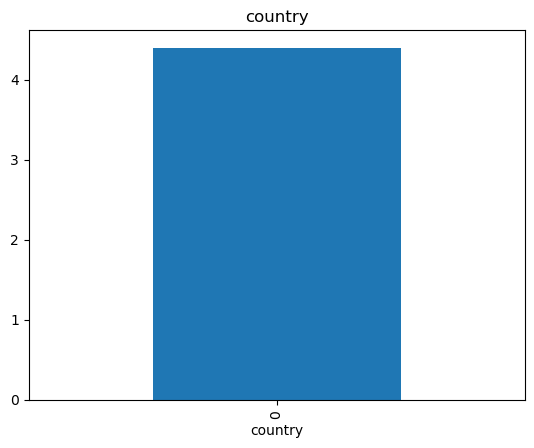

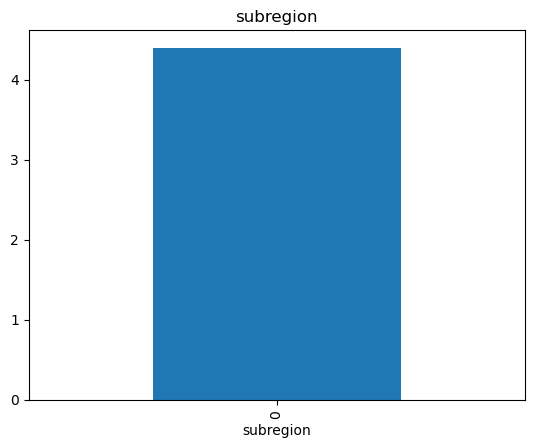

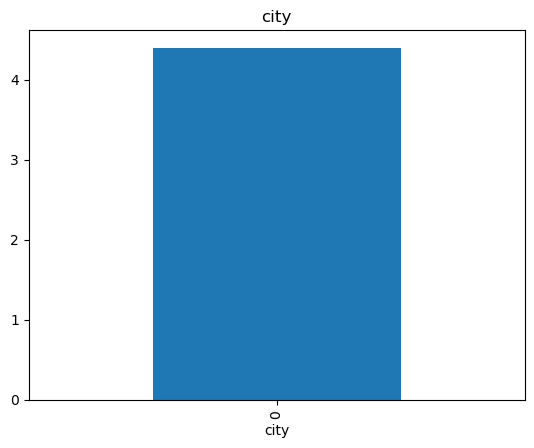

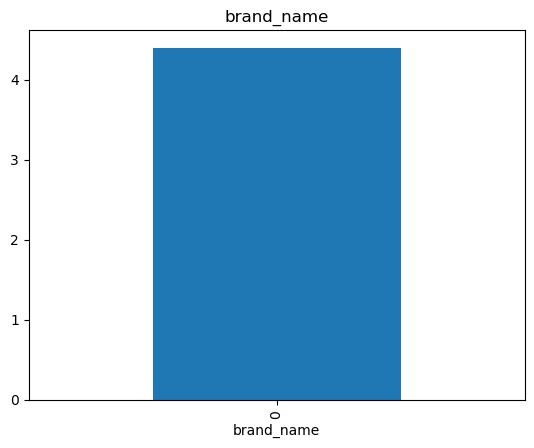

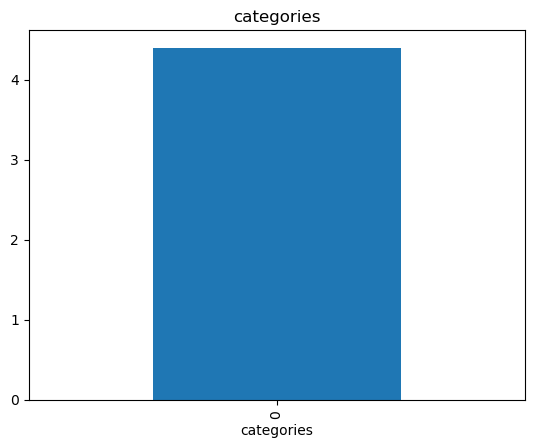

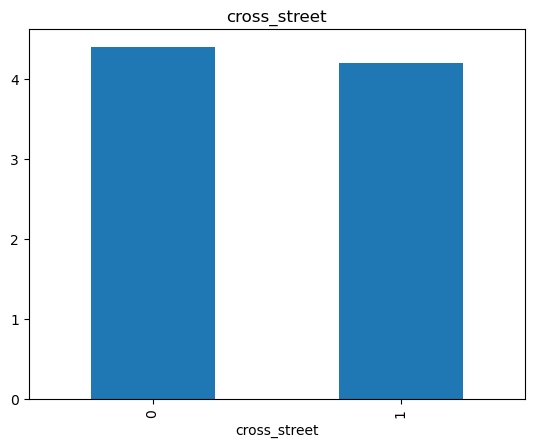

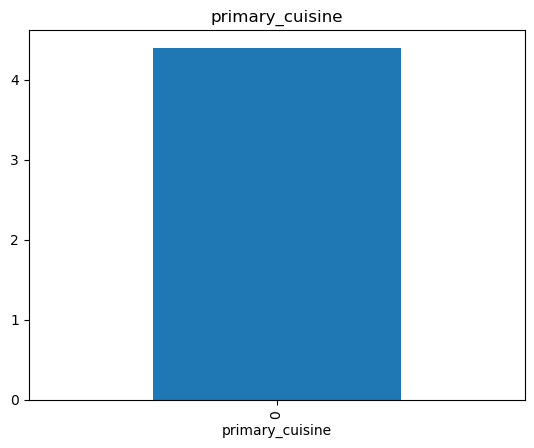

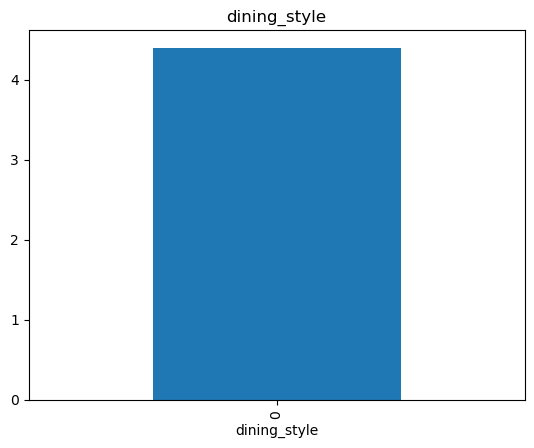

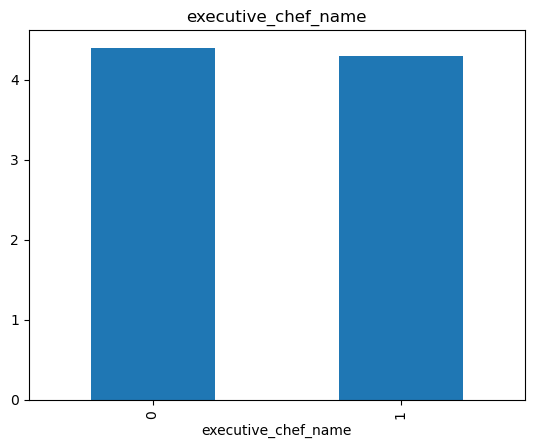

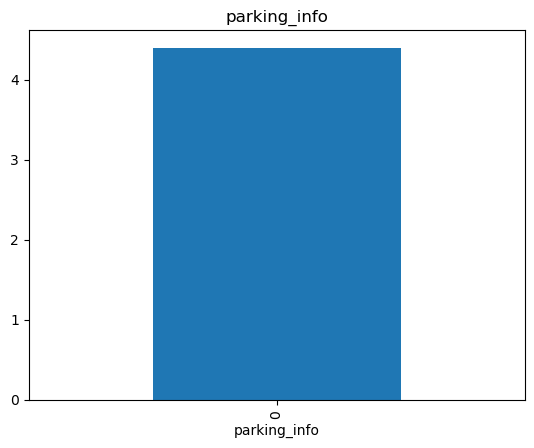

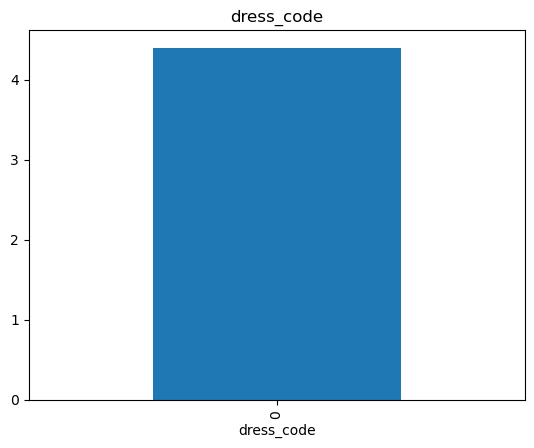

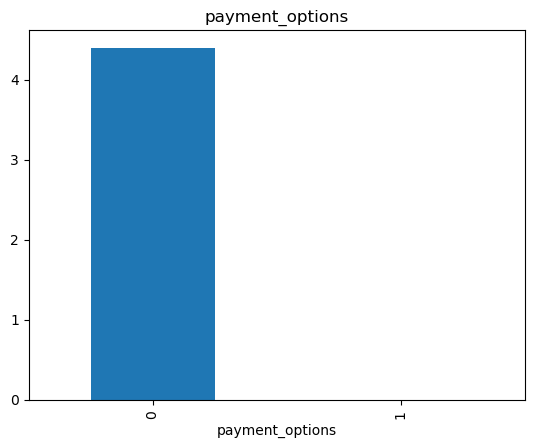

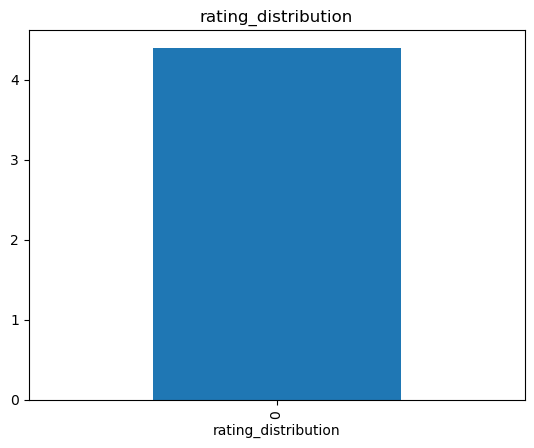

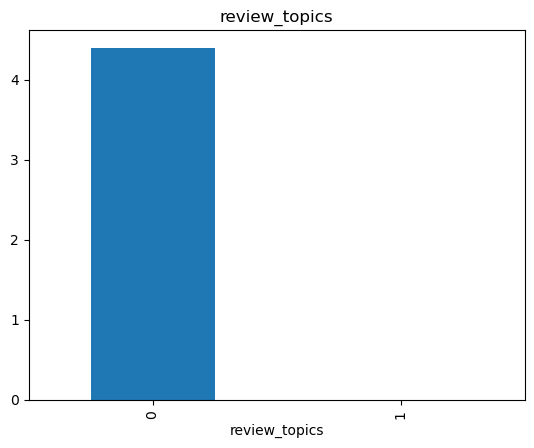

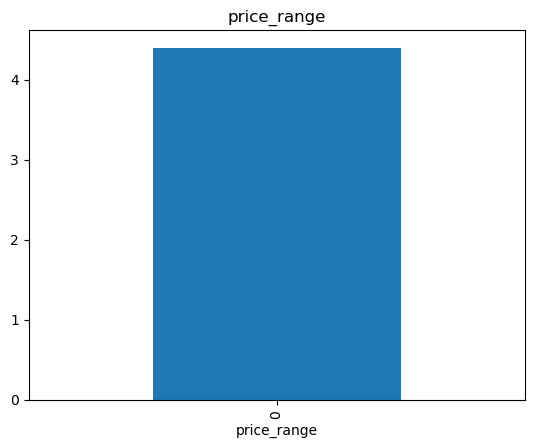

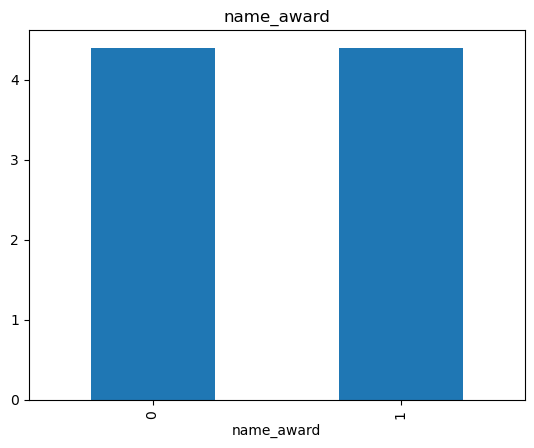

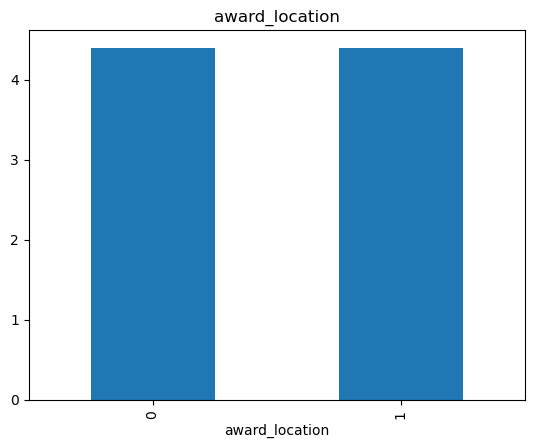

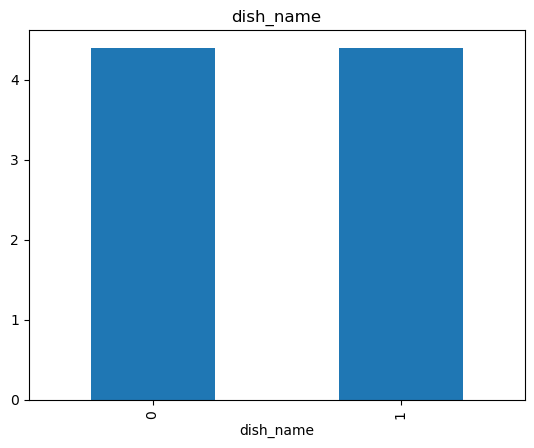

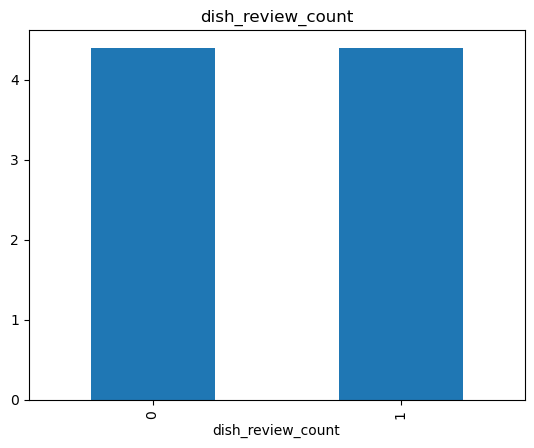

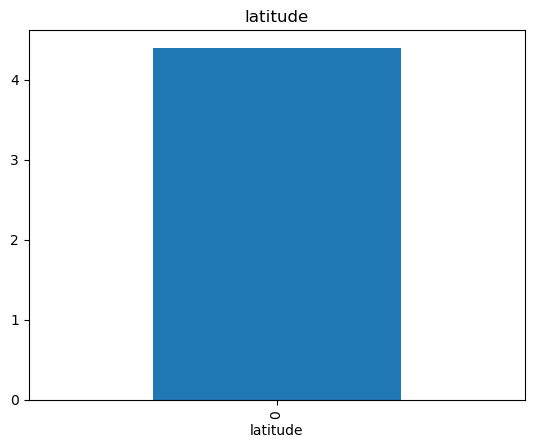

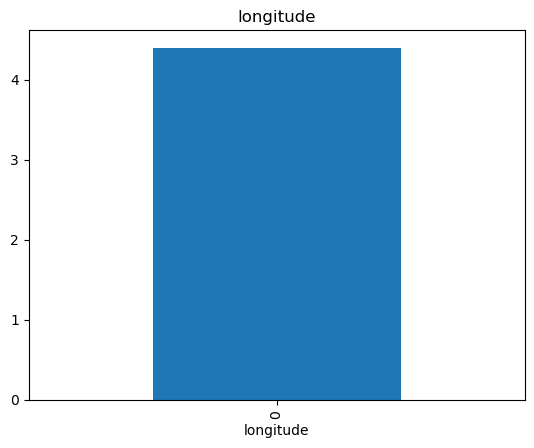

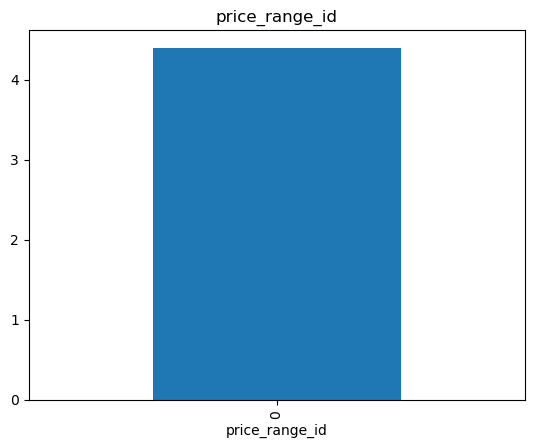

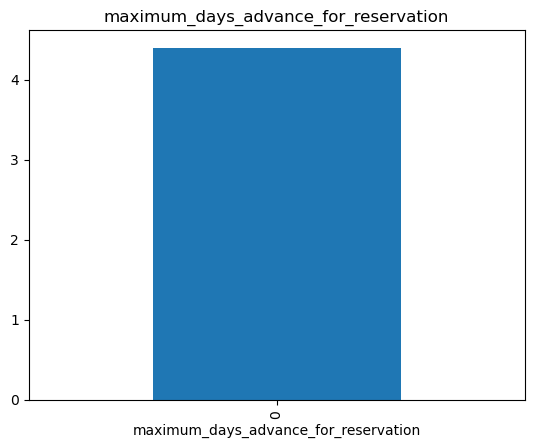

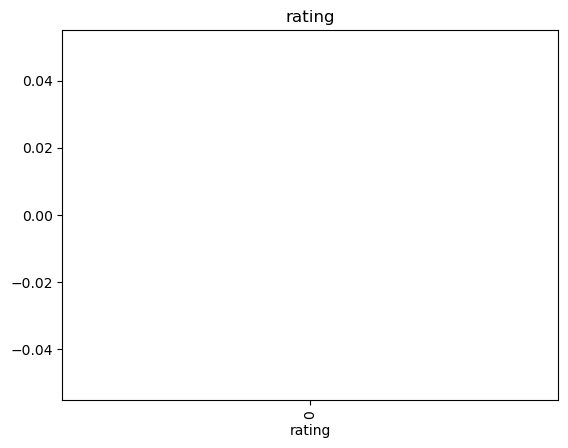

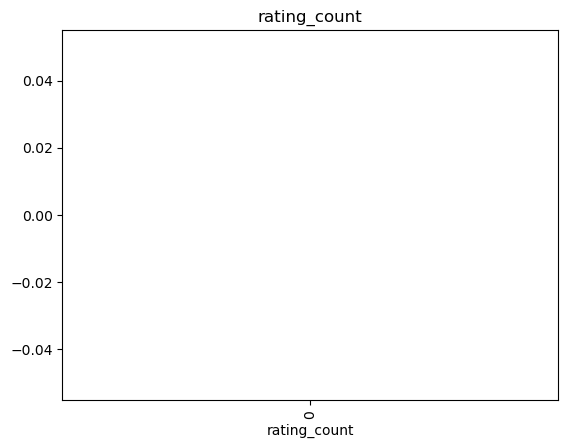

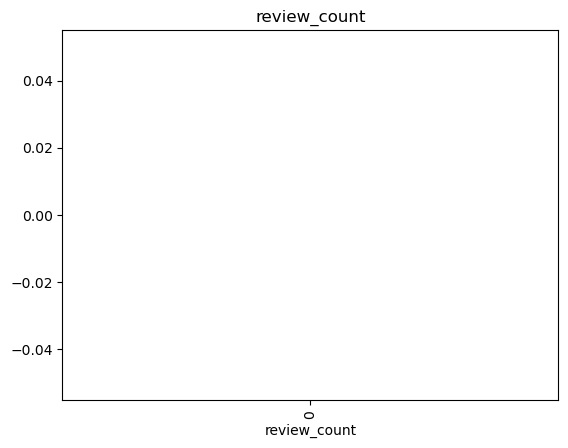

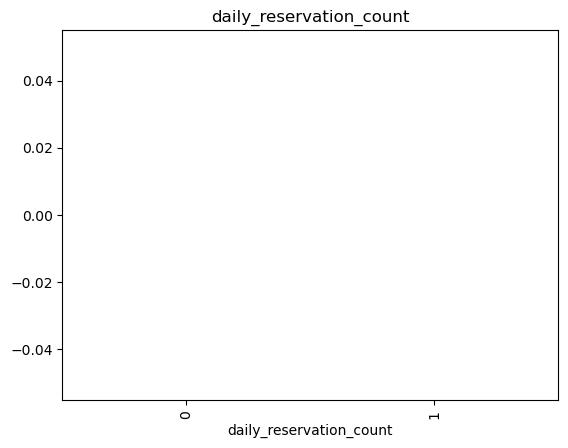

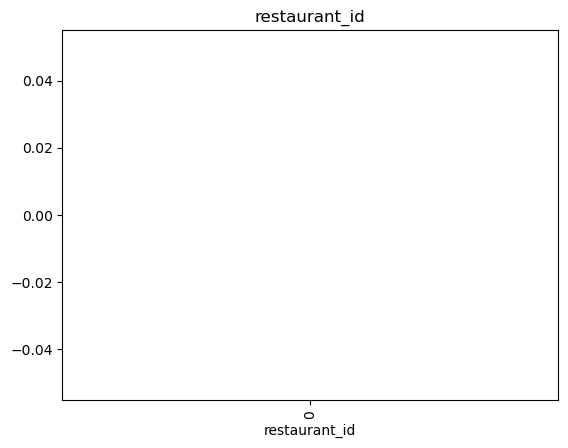

In [31]:
## Deciding whether missing values are important or not : 
data = df_final.copy()
for feature in df_final.columns : 
    
    # Let's make a variable that indicarte 1 if observation was missing or 0 otherwise 
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    ## lets calculate the median rating where the information is missing or presenrt 
    
    data.groupby(feature)['rating'].median().plot.bar()
    plt.title(feature)
    plt.show()

missing values of columns --> cross street , executive chef name , name_award, 
award_location , dish_name , dish_review_count have impact on median rating

### Checking impact on price range  columns :

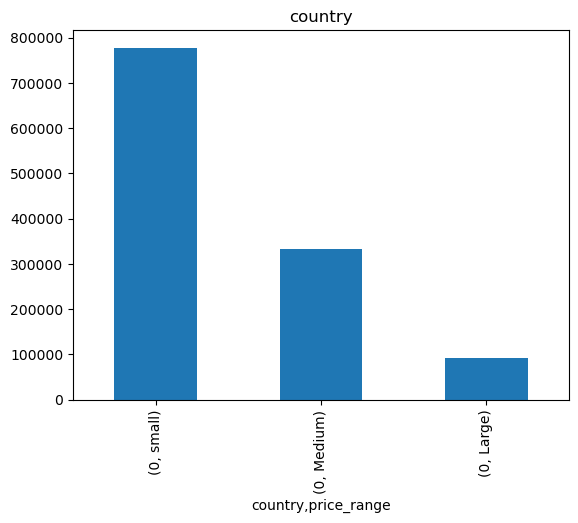

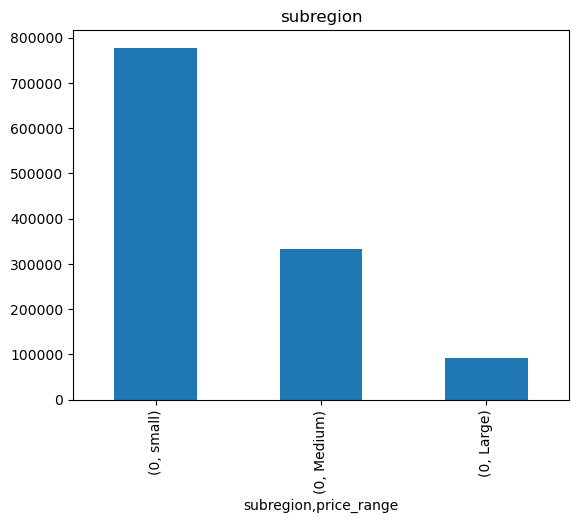

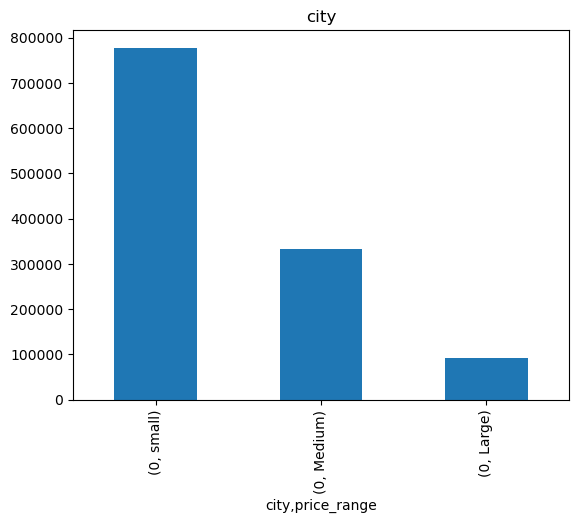

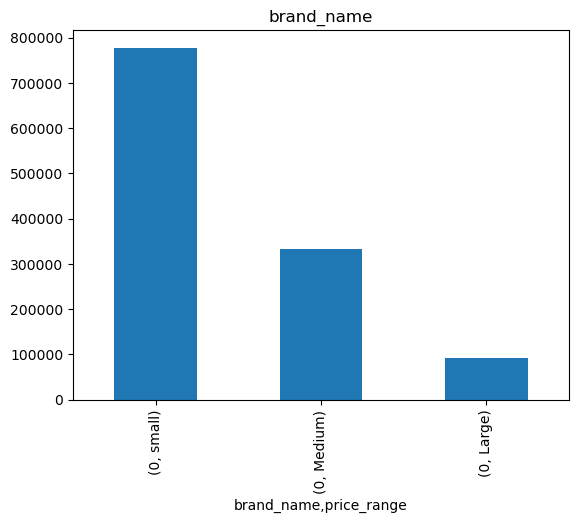

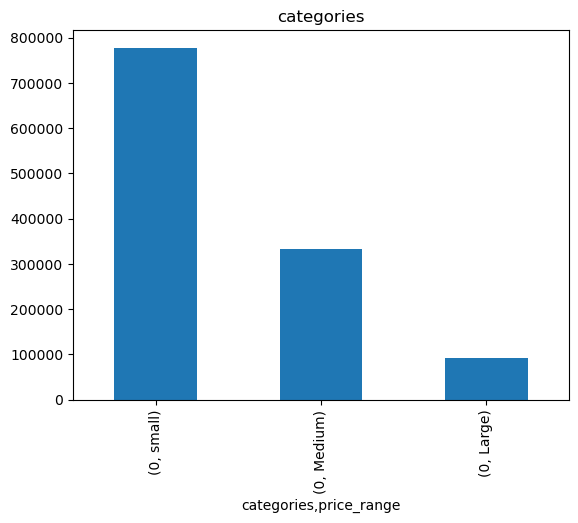

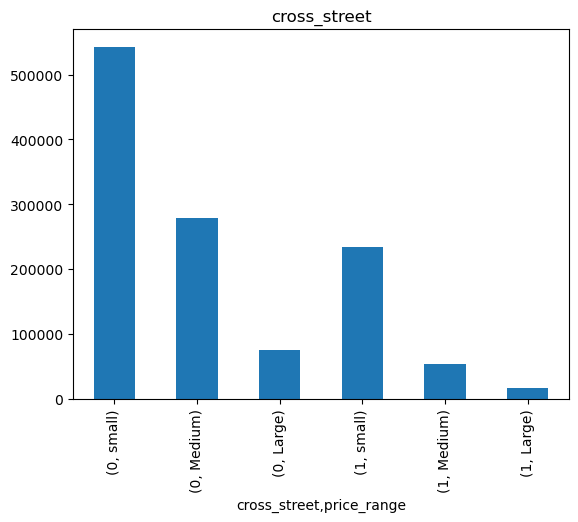

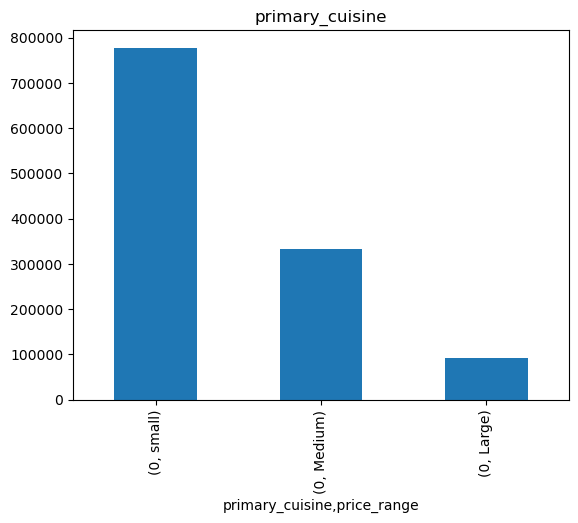

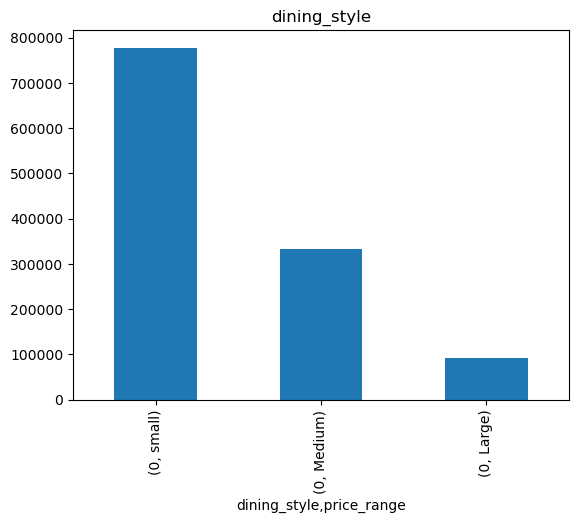

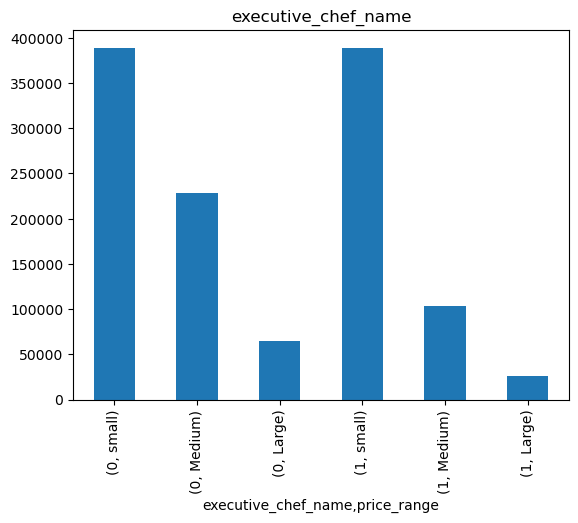

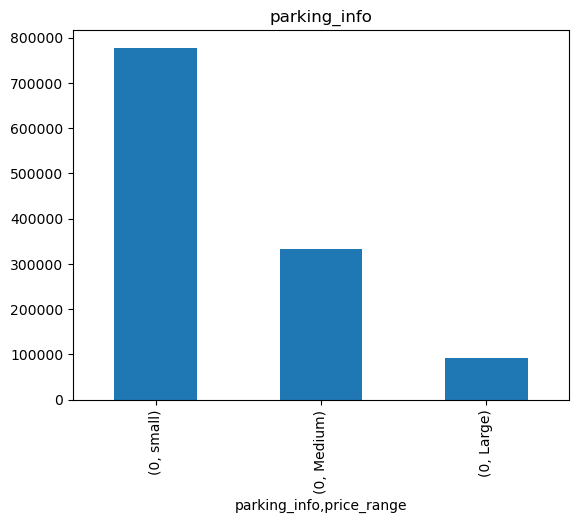

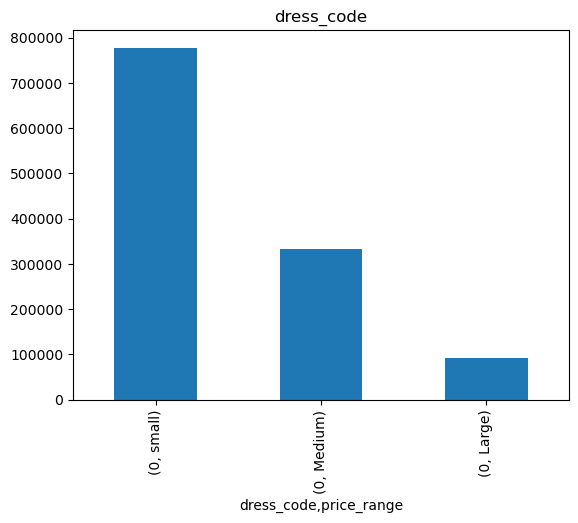

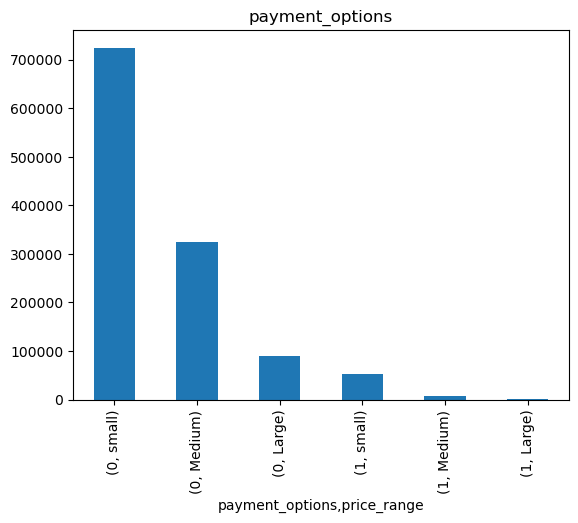

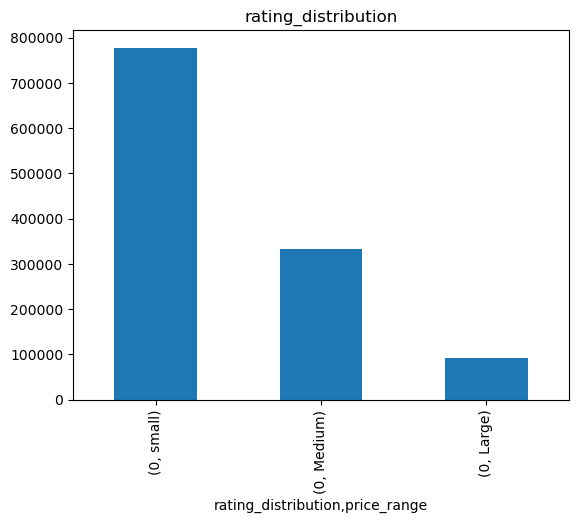

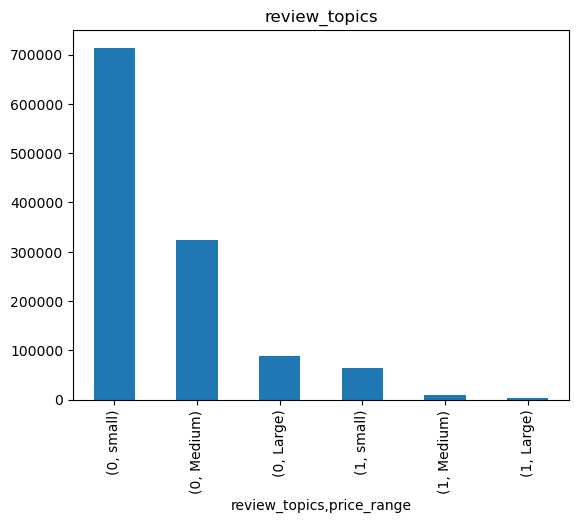

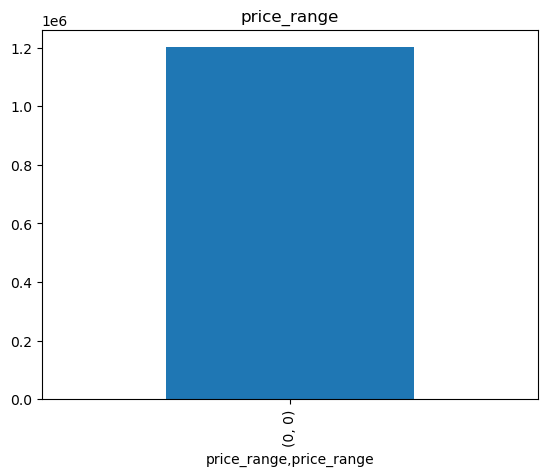

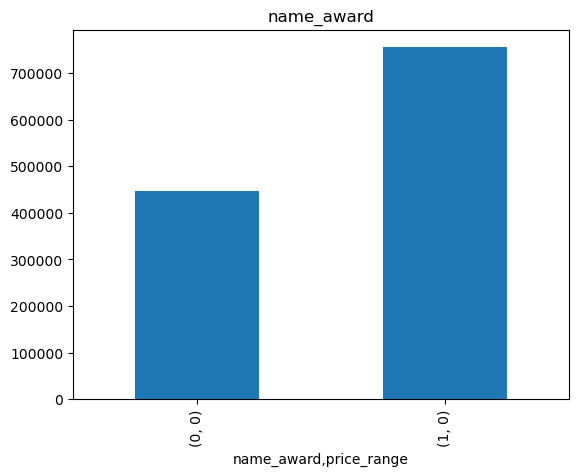

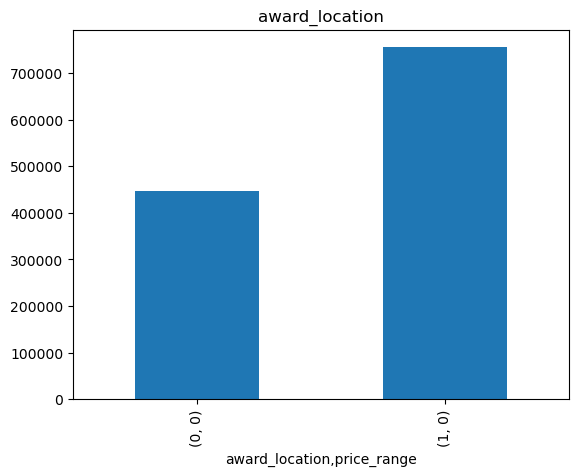

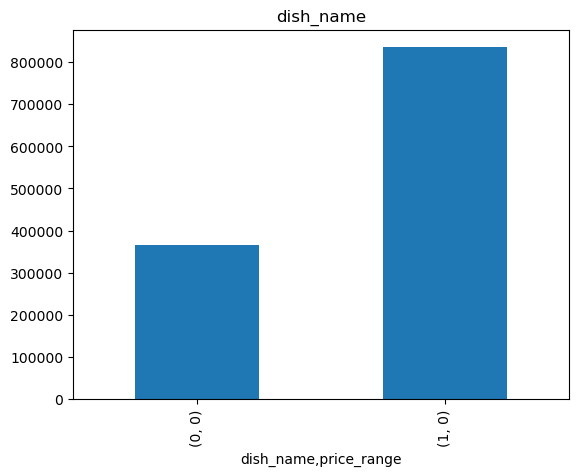

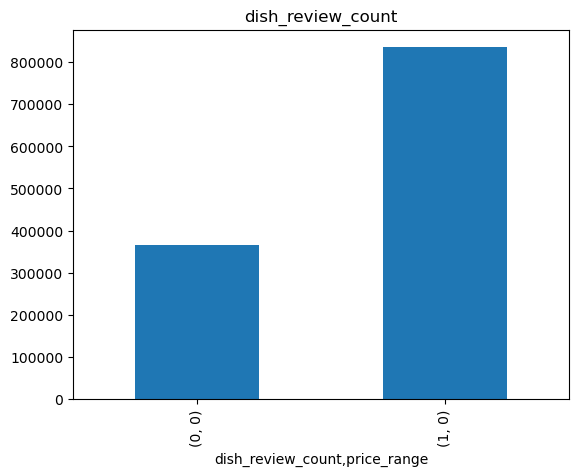

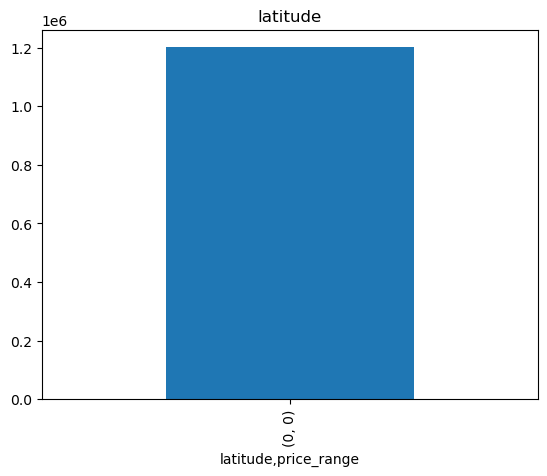

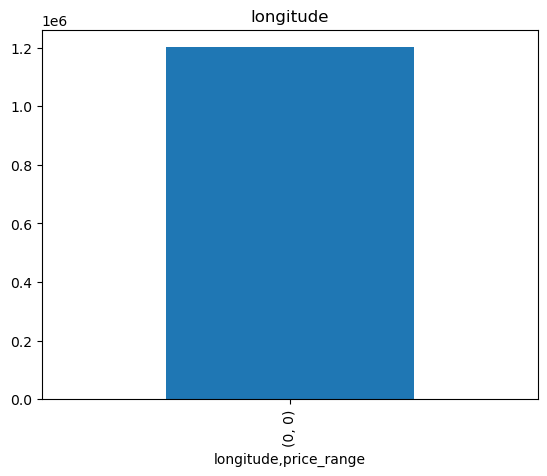

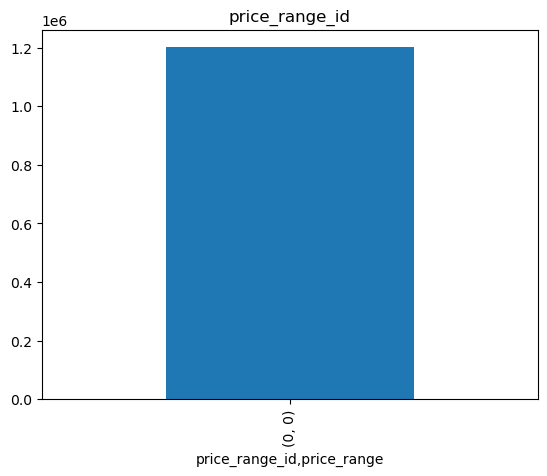

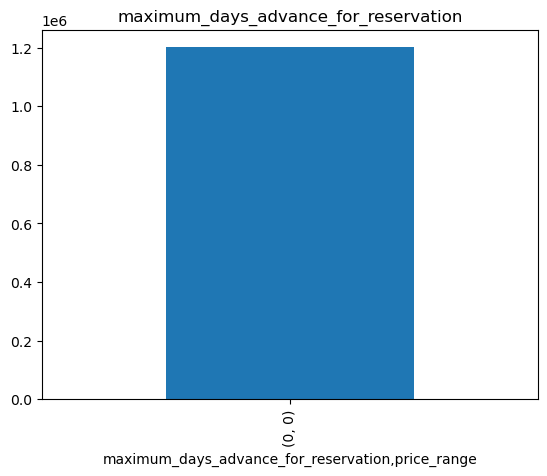

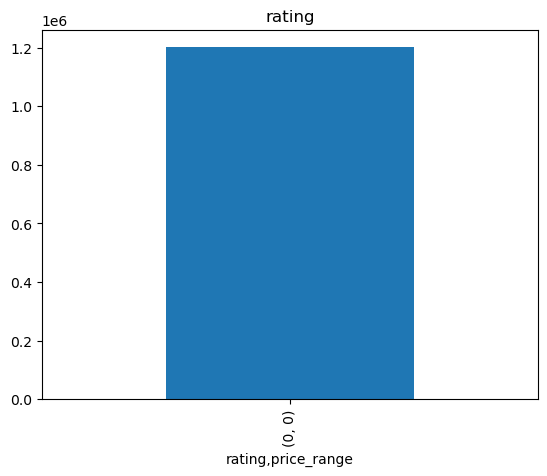

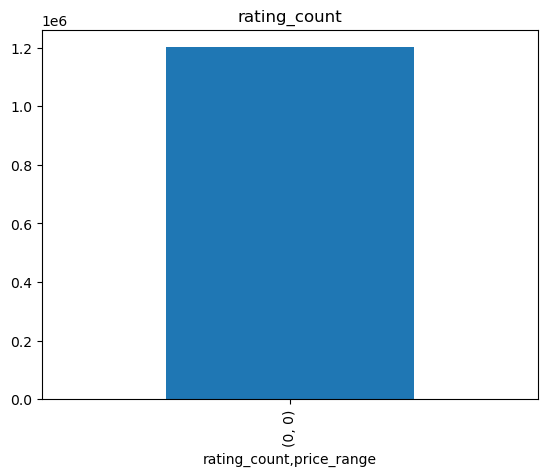

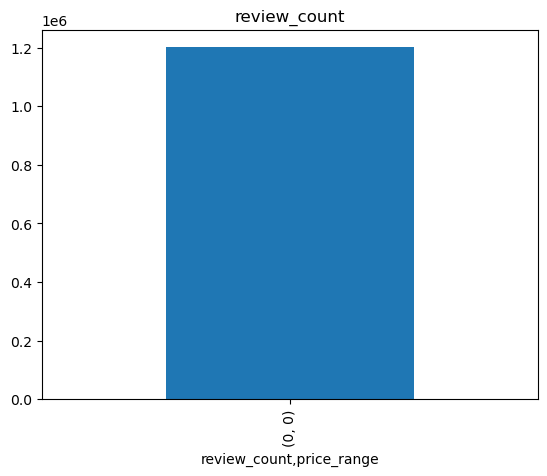

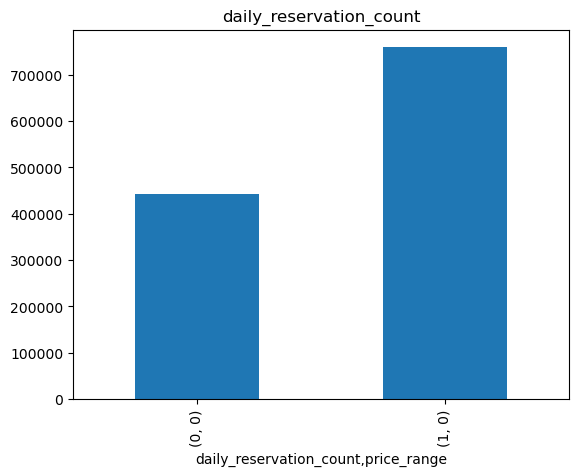

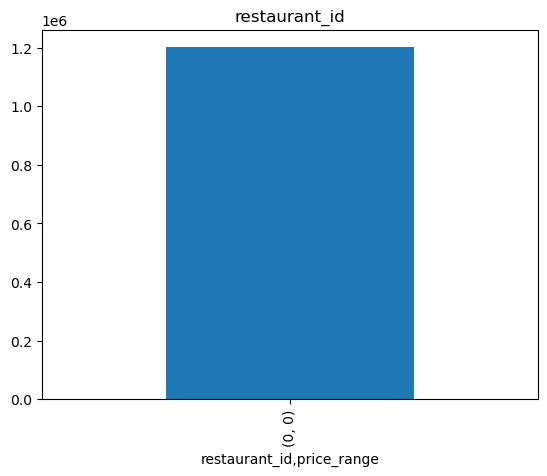

In [32]:
## Deciding whether missing values are important or not : 
data = df_final.copy()
for feature in df_final.columns : 
    
    # Let's make a variable that indicarte 1 if observation was missing or 0 otherwise 
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    ## lets calculate the price range value counts where the information is missing or presenrt 
    
    data.groupby(feature)['price_range'].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

missing values of  columns --> cross_street , executive_chef_name,payment_options,review_topics 
have impact on price range 

In [40]:
## Checking percentage of nan values in columns greater than 50%
missing_val_percentage(df_final)[missing_val_percentage(df_final)['percentage_of_NaN'] > 0.50 ]

,columns,percentage_of_NaN
15,name_award,0.628762
16,award_location,0.628762
17,dish_name,0.695136
18,dish_review_count,0.695136
26,daily_reservation_count,0.631792


- daily_reservation_count column can be drop because it have nan values greater than 50% and also it is not impacting price range and ratings 
- award_location seem non usefull so we can drop it 
- dish_name do not have impact on price_range so we can drop it 


In [41]:
## Dropping this columns :
df_final.drop(columns=['daily_reservation_count','award_location','dish_name'],inplace=True)

In [42]:
df_final.head(2)

,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,price_range,name_award,dish_review_count,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Spicy,small,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,1
1,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,None,Thai,Casual Dining,None,Street Parking,Casual Dress,AMEX,2,Casual,small,NaN,NaN,34.09751,-118.335921,2,90,4.6,136,18,1


In [43]:
## Checking percentage of nan values in columns greater than 50%
missing_val_percentage(df_final)[missing_val_percentage(df_final)['percentage_of_NaN'] > 0.50 ]

,columns,percentage_of_NaN
15,name_award,0.628762
16,dish_review_count,0.695136


for this two columns we need to use different imputation technique

### Missing Value Imputation:

In [44]:
import seaborn as sns

In [68]:
## making list of numerical and categorical columns
numerical_columns_final = list(df_final.dtypes[df_final.dtypes != object].index)
categorical_columns_final = list(df_final.dtypes[df_final.dtypes == object].index)

In [69]:
## removing name_award and dish_review count  column so that we apply different 
#imputation technique on them
categorical_columns_final.remove('name_award')
numerical_columns_final.remove('dish_review_count')

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
## we need to install a library for imputation
!pip install feature-engine

In [61]:
from feature_engine.imputation import RandomSampleImputer
# dish_review_count column
imputer_dish = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='median')), # for dish review count column
])

# Numerical columns
imputer_numerical = Pipeline(steps=[
 ('imputer', IterativeImputer(estimator = RandomForestRegressor(), 
    max_iter=10, random_state=0)), # for numerical columns
])


# categorical columns 
imputer_categorical = Pipeline(steps=[
 ('imputer', RandomSampleImputer()),
])

# award_name_column imputer : 
imputer_award_name = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [64]:
## Applying Column Transformer : 
preprocessor = ColumnTransformer(transformers=[
 ('imputer_dish', imputer_dish,['dish_review_count']),
    
 ('imputer_numerical', imputer_numerical, numerical_columns_final),
    
 ('imputer_categorical', imputer_categorical,categorical_columns_final),
    
 ('imp_cat_missing', imputer_award_name, ['name_award']),
    
 ], remainder='passthrough')

In [65]:
preprocessor.fit_transform(df_final)

array([[8.0, 34.09751, -118.335921, ..., 'Spicy', 'small', 'Most Booked'],
       [8.0, 34.09751, -118.335921, ..., 'Casual', 'small',
        'Most Booked'],
       [8.0, 34.09751, -118.335921, ..., 'Neighborhood Gem', 'small',
        'Most Booked'],
       ...,
       [8.0, 34.05427, -118.35499, ..., 'Great for Lunch', 'small',
        'Most Booked'],
       [8.0, 34.05427, -118.35499, ..., 'Authentic', 'small',
        'Most Booked'],
       [8.0, 34.05427, -118.35499, ..., 'Neighborhood Gem', 'small',
        'Most Booked']], dtype=object)

In [67]:
df_finl_array = preprocessor.transform(df_final)

In [70]:
## converting into dataframe 
df_final = pd.DataFrame(df_finl_array,columns=df_final.columns)

In [71]:
## saving to csv.
df_final.to_csv('df_final.csv')

In [72]:
## checking percentage after imputation : 
missing_val_percentage(df_final)

,columns,percentage_of_NaN
0,country,0.0
1,subregion,0.0
2,city,0.0
3,brand_name,0.0
4,categories,0.0
5,cross_street,0.0
6,primary_cuisine,0.0
7,dining_style,0.0
8,executive_chef_name,0.0
9,parking_info,0.0


### Encoding : 

In [52]:
## reading imputed data in previous step
df_final_new = pd.read_csv('df_final.csv',index_col=False).drop(columns='Unnamed: 0')

In [81]:
## sequence of columns used while imputation.
new_columns = ['dish_review_count'] + numerical_columns_final + categorical_columns_final + ['name_award']

In [82]:
df_final_new.columns = new_columns 

In [84]:
df_final_new.head(2)

,dish_review_count,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,restaurant_id,country,subregion,city,brand_name,categories,cross_street,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,payment_options,rating_distribution,review_topics,price_range,name_award
0,8.0,34.09751,-118.335921,2.0,90.0,4.6,136.0,18.0,1.0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,Main Street,Thai,Casual Dining,Ted Hopson,Street Parking,Casual Dress,AMEX,2,Spicy,small,Most Booked
1,8.0,34.09751,-118.335921,2.0,90.0,4.6,136.0,18.0,1.0,United States,California,Los Angeles,Luv2Eat Thai Bistro,Thai,Sunset Blvd and Sunset Plaza Drive.,Thai,Casual Dining,Christian Palmos,Street Parking,Casual Dress,AMEX,2,Casual,small,Most Booked


In [199]:
## appending name_award column wich we removed previously
categorical_columns_final.append('name_award')

In [96]:
df_final_new.columns

Index(['dish_review_count', 'latitude', 'longitude', 'price_range_id',
       'maximum_days_advance_for_reservation', 'rating', 'rating_count',
       'review_count', 'restaurant_id', 'country', 'subregion', 'city',
       'brand_name', 'categories', 'cross_street', 'primary_cuisine',
       'dining_style', 'executive_chef_name', 'parking_info', 'dress_code',
       'payment_options', 'rating_distribution', 'review_topics',
       'price_range', 'name_award'],
      dtype='object')

In [126]:
## Checking the category counts of each columns
df_cat_counts = pd.concat([pd.DataFrame([df_final_new[i].nunique()], columns=['category_count']) for i in df_final_new.columns],
...           ignore_index=True).reset_index().rename(columns={'index':"column_name"})
df_cat_counts.column_name = df_final_new.columns
df_cat_counts

,column_name,category_count
0,dish_review_count,143
1,latitude,17421
2,longitude,17563
3,price_range_id,3
4,maximum_days_advance_for_reservation,44
5,rating,36
6,rating_count,1856
7,review_count,2067
8,restaurant_id,18316
9,country,1


In [200]:
## Checking the category counts of categorical columns
df_cat_counts_cat = pd.concat([pd.DataFrame([df_final_new[i].nunique()], columns=['category_count']) for i in categorical_columns_final],
...           ignore_index=True).reset_index().rename(columns={'index':"column_name"})
df_cat_counts_cat.column_name = categorical_columns_final
df_cat_counts_cat

,column_name,category_count
0,country,1
1,subregion,1
2,city,762
3,brand_name,17543
4,categories,215
5,cross_street,5012
6,primary_cuisine,179
7,dining_style,5
8,executive_chef_name,4168
9,parking_info,6


In [201]:
## checking categories which are greater than 500
df_cat_counts_cat[(df_cat_counts_cat['category_count'] < 500)]

,column_name,category_count
0,country,1
1,subregion,1
4,categories,215
6,primary_cuisine,179
7,dining_style,5
9,parking_info,6
10,dress_code,7
11,payment_options,13
13,review_topics,52
14,price_range,3


In [202]:
## Seperating columns based upon categories 
## Here i have divided the columns in Three steps :

# 1. category less than 5 - should be encoded using OneHotEncoding technique
# 2. Category between 5 and 500 - Should be encoded using ordinal encoding method
# 3. Category greater than 500 - Should be encoded using Count encoding method

cat_less_than_5 = []
cat_bw_5_and_500 = []
cat_grt_500 = []
for i in range(len(df_cat_counts_cat)): 
    if df_cat_counts_cat['category_count'][i]<=5: 
        cat_less_than_5.append(df_cat_counts_cat['column_name'][i])
    elif (df_cat_counts_cat['category_count'][i]>5) and (df_cat_counts_cat['category_count'][i]<500): 
        cat_bw_5_and_500.append(df_cat_counts_cat['column_name'][i])
    
    elif df_cat_counts_cat['category_count'][i]>500: 
        cat_grt_500.append(df_cat_counts_cat['column_name'][i])

In [203]:
# Category between 5 and 500
cat_bw_5_and_500

['categories',
 'primary_cuisine',
 'parking_info',
 'dress_code',
 'payment_options',
 'review_topics',
 'name_award']

In [204]:
# category less than 5
cat_less_than_5

['country', 'subregion', 'dining_style', 'price_range']

In [205]:
# Category greater than 500
cat_grt_500

['city',
 'brand_name',
 'cross_street',
 'executive_chef_name',
 'rating_distribution']

In [ ]:
## creating a custom Feature transformation class for category values betqween 5 and 500  : 
columns = cat_bw_5_and_500
from sklearn.pipeline import Pipeline 
from sklearn.base import BaseEstimator,TransformerMixin
class CustomTransformer(BaseEstimator,TransformerMixin): 
    
    def __init__(self,column_list,df_final_new):  
        self.column_list = column_list
        self.df_final_new = df_final_new 
         
    def fit(self,X,y=None): 
        return self 
    
    def encode(self,column_list:list): 
        df_final_copy = df_final_new.copy()
        for column in column_list: 
            map_dict = {j:i for i,j in enumerate(self.df_final_new.groupby(self.df_final_new[column])
                                      .count()['price_range'].sort_values().index)}
            df_final_copy[column] = self.df_final_new[column].map(map_dict)
        return df_final_copy[column_list]

    
    def transform(self,X,y=None):
        X = self.encode(self.column_list)
        return X 

In [298]:
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import CountFrequencyEncoder
# for values less than 5 
encoder1 = Pipeline(steps=[
 ('encoder', OneHotEncoder()), 
])

# values greater than 500 
encoder2 = Pipeline(steps=[
 ('encoder',CountFrequencyEncoder(encoding_method='count',variables=None)) 
])


## Values between 5 and 500 
encoder3 = Pipeline(steps=[
    ('encoder',CustomTransformer(column_list=cat_bw_5_and_500,df_final_new=df_final_new))
])


In [301]:
## Applying Column Transformer : 
preprocessor_encoding = ColumnTransformer(transformers=[
 ('encoder1', encoder1,cat_less_than_5),
    
 ('encoder2', encoder2, cat_grt_500),
    
 ('encoder3', encoder3,cat_bw_5_and_500),
 

 ], remainder='passthrough')


In [267]:
## extracting features from encoder 
## encoer1 
encoder1.fit(df_final_new[cat_less_than_5])
encoder1_features = encoder1.get_feature_names_out()

## encoder2 
encoder2.fit(df_final_new[cat_grt_500])
encoder2_features = encoder2.get_feature_names_out()


In [302]:
df_obj = preprocessor_encoding.fit_transform(df_final_new)

In [303]:
## Sequence of columns passed to feature transformation object 
column_list_encoding = encoder1_features + encoder2_features + cat_bw_5_and_500 + ['dish_review_count']+numerical_columns_final

In [304]:
df_new1 = pd.DataFrame(df_obj,columns=column_list_encoding)

In [305]:
df_new1.head(2)

,country_United States,subregion_California,dining_style_Casual Dining,dining_style_Casual Elegant,dining_style_Fine Dining,dining_style_Home Style,dining_style_Elegant Dining,price_range_small,price_range_Medium,price_range_Large,city,brand_name,cross_street,executive_chef_name,rating_distribution,categories,primary_cuisine,parking_info,dress_code,payment_options,review_topics,name_award,dish_review_count,latitude,longitude,price_range_id,maximum_days_advance_for_reservation,rating,rating_count,review_count,restaurant_id
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,113420.0,60.0,4489.0,475.0,2.0,186.0,164.0,5.0,6.0,10.0,6.0,38.0,8.0,34.09751,-118.335921,2.0,90.0,4.6,136.0,18.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,113420.0,60.0,227.0,302.0,2.0,186.0,164.0,5.0,6.0,10.0,46.0,38.0,8.0,34.09751,-118.335921,2.0,90.0,4.6,136.0,18.0,1.0


In [306]:
## Standardscaling 
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
df_arr = scalar.fit_transform(df_new1)

In [308]:
df_final = pd.DataFrame(df_arr,columns=df_new1.columns)

### PCA

In [321]:
## Dropping these two columns because they have only one category and can be treated as redundant
df_final = df_final.drop(columns=['country_United States','subregion_California'])

In [322]:
from sklearn.decomposition import PCA 

In [323]:
pca = PCA()
pd.DataFrame(pca.fit_transform(df_final))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-2.137575,0.345480,-0.387680,-1.423105,0.311149,0.428228,0.147620,2.877104,-0.574878,2.124183,-1.535187,3.131506,-1.597495,1.445909,-1.638491,-3.247101,-1.139215,0.028752,1.201447,1.572551,-0.525299,0.684144,-0.389486,-1.502228,0.036982,0.057698,4.715325e-10,3.034686e-10,-8.209294e-12
1,-1.961105,0.320565,-0.096792,-0.433888,0.018613,0.582976,0.188562,-0.377488,-1.182703,0.923865,-0.161208,0.744169,-0.415426,-1.502900,-0.449444,0.558713,-0.375846,-1.255335,0.562709,0.538090,-0.298209,0.077248,-0.144031,-1.116936,-0.022431,0.051455,-7.049100e-11,-1.360609e-10,1.591843e-10
2,-1.921766,0.303831,-0.008409,-0.393847,0.025627,0.571439,0.174422,-0.476397,-1.211770,0.809642,-0.084905,0.698506,-0.441056,-1.745013,-0.005029,0.699976,-0.355083,-1.347516,0.578696,0.471863,-0.275151,0.009139,-0.101433,-1.148028,-0.032728,0.053801,1.812947e-12,1.657929e-11,1.295465e-11
3,-2.279554,0.460354,-0.812076,-0.738098,-0.047433,0.679737,0.309094,0.347263,-0.955556,1.826396,-0.737126,1.034730,-0.159720,0.386683,-4.078954,-0.490604,-0.497262,-0.530370,0.414125,1.054911,-0.488311,0.621910,-0.487761,-0.853702,0.059305,0.031944,-7.497698e-12,5.273310e-12,1.477428e-12
4,-1.882069,0.602040,0.443883,-1.165795,0.178265,0.071495,0.405995,1.440067,-0.384964,0.760793,0.766252,0.073541,-0.027624,-2.914083,0.212229,-0.486854,2.267997,-0.642607,1.117109,0.967296,-1.054543,0.339972,-0.130772,-1.865388,-0.029100,0.062509,-2.698263e-11,-2.010604e-10,-1.369851e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201285,-2.046093,0.912337,-0.404964,1.730891,1.517212,0.717759,-0.960871,5.593731,1.732276,-1.818898,-1.720614,4.520562,-3.088270,2.934765,3.422437,-0.787376,-2.874613,-0.723957,2.481268,1.518036,-0.463260,0.295804,-0.160256,-0.443021,-0.137033,0.006231,-1.654656e-14,-1.197171e-14,4.072584e-16
1201286,-2.327738,1.075992,-0.989044,2.204132,1.178306,1.110109,-0.772720,3.813522,1.069967,-1.226576,-1.640254,2.653137,-1.613759,2.372443,1.513574,-1.290147,-0.508541,-1.007969,1.602927,1.053520,-0.635969,0.313103,-0.324978,0.311874,-0.093805,-0.014037,-1.096505e-14,-8.593056e-15,4.160571e-16
1201287,-2.385924,1.179847,-1.168617,2.960834,0.830809,1.341622,-0.621250,1.099824,0.556495,-1.696012,-0.653466,0.262315,-0.110505,0.491987,0.469245,1.229540,0.870589,-1.786854,0.823707,0.332397,-0.630853,0.071071,-0.312310,0.883852,-0.096252,-0.032178,1.185766e-15,2.007163e-15,-1.345556e-17
1201288,-2.337563,1.184340,-1.057943,2.883895,0.870286,1.241546,-0.621413,1.308159,0.733793,-1.889059,-0.476284,0.339879,-0.209877,0.376304,0.543087,1.688740,0.607471,-1.739512,0.961608,0.411903,-0.650350,0.089704,-0.292274,0.739927,-0.102148,-0.030666,1.490868e-15,2.340301e-15,3.796318e-17


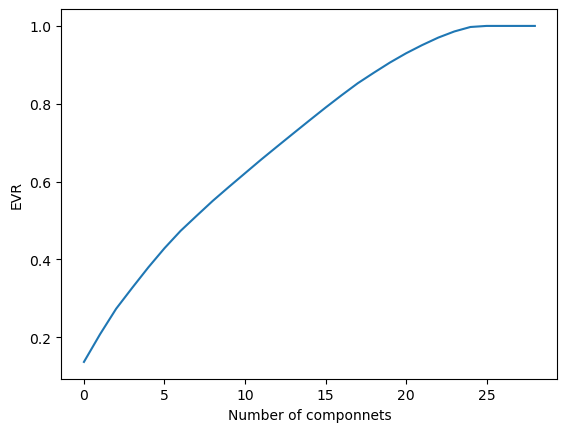

In [324]:
## Plotting variance explanation ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of componnets")
plt.ylabel("EVR")
plt.show()

we can observe from this plot that around 25 PC are explaining the dataset , so we choose no of components equals to 25 

In [338]:
pca1 = PCA(n_components=25)
pd.DataFrame(pca1.fit_transform(df_final),columns = [f'PCA{i}' for i in range(25)])

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24
0,-2.137575,0.345480,-0.387680,-1.423105,0.311149,0.428228,0.147620,2.877104,-0.574878,2.124183,-1.535187,3.131506,-1.597495,1.445909,-1.638491,-3.247101,-1.139215,0.028752,1.201447,1.572551,-0.525299,0.684144,-0.389486,-1.502228,0.036982
1,-1.961105,0.320565,-0.096792,-0.433888,0.018613,0.582976,0.188562,-0.377488,-1.182703,0.923865,-0.161208,0.744169,-0.415426,-1.502900,-0.449444,0.558713,-0.375846,-1.255335,0.562709,0.538090,-0.298209,0.077248,-0.144031,-1.116936,-0.022431
2,-1.921766,0.303831,-0.008409,-0.393847,0.025627,0.571439,0.174422,-0.476397,-1.211770,0.809642,-0.084905,0.698506,-0.441056,-1.745013,-0.005029,0.699976,-0.355083,-1.347516,0.578696,0.471863,-0.275151,0.009139,-0.101433,-1.148028,-0.032728
3,-2.279554,0.460354,-0.812076,-0.738098,-0.047433,0.679737,0.309094,0.347263,-0.955556,1.826396,-0.737126,1.034730,-0.159720,0.386683,-4.078954,-0.490604,-0.497262,-0.530370,0.414125,1.054911,-0.488311,0.621910,-0.487761,-0.853702,0.059305
4,-1.882069,0.602040,0.443883,-1.165795,0.178265,0.071495,0.405995,1.440067,-0.384964,0.760793,0.766252,0.073541,-0.027624,-2.914083,0.212229,-0.486854,2.267997,-0.642607,1.117109,0.967296,-1.054543,0.339972,-0.130772,-1.865388,-0.029100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201285,-2.046093,0.912337,-0.404964,1.730891,1.517212,0.717759,-0.960871,5.593731,1.732276,-1.818898,-1.720614,4.520562,-3.088270,2.934765,3.422437,-0.787376,-2.874613,-0.723957,2.481268,1.518036,-0.463260,0.295804,-0.160256,-0.443021,-0.137033
1201286,-2.327738,1.075992,-0.989044,2.204132,1.178306,1.110109,-0.772720,3.813522,1.069967,-1.226576,-1.640254,2.653137,-1.613759,2.372443,1.513574,-1.290147,-0.508541,-1.007969,1.602927,1.053520,-0.635969,0.313103,-0.324978,0.311874,-0.093805
1201287,-2.385924,1.179847,-1.168617,2.960834,0.830809,1.341622,-0.621250,1.099824,0.556495,-1.696012,-0.653466,0.262315,-0.110505,0.491987,0.469245,1.229540,0.870589,-1.786854,0.823707,0.332397,-0.630853,0.071071,-0.312310,0.883852,-0.096252
1201288,-2.337563,1.184340,-1.057943,2.883895,0.870286,1.241546,-0.621413,1.308159,0.733793,-1.889059,-0.476284,0.339879,-0.209877,0.376304,0.543087,1.688740,0.607471,-1.739512,0.961608,0.411903,-0.650350,0.089704,-0.292274,0.739927,-0.102148


#### Finding redundant columns

In [337]:
import numpy as np
corr_matrix = df_final.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]
df_final_1 = df_final.drop(to_drop, axis=1)

C:\Users\manev\AppData\Local\Temp\ipykernel_3236\1394849075.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [336]:
## finding Redundant columns 
l = []
for i in df_final.columns : 
    if i not in df_final_1: 
        l.append(i)
l

['longitude', 'price_range_id']

In [340]:
## Dropping redundant columns 
df_final = df_final.drop(columns=['longitude', 'price_range_id'])

In [341]:
df_final.head(2)

,dining_style_Casual Dining,dining_style_Casual Elegant,dining_style_Fine Dining,dining_style_Home Style,dining_style_Elegant Dining,price_range_small,price_range_Medium,price_range_Large,city,brand_name,cross_street,executive_chef_name,rating_distribution,categories,primary_cuisine,parking_info,dress_code,payment_options,review_topics,name_award,dish_review_count,latitude,maximum_days_advance_for_reservation,rating,rating_count,review_count,restaurant_id
0,0.769922,-0.635248,-0.272152,-0.07427,-0.101543,0.737836,-0.61756,-0.287638,1.484566,-1.44758,5.120812,0.255196,-0.249094,-0.280846,0.012598,1.207105,0.738913,-0.199269,-4.313362,0.580558,-0.149449,-0.629212,-0.241055,0.471235,-0.301124,-0.565976,-1.723135
1,0.769922,-0.635248,-0.272152,-0.07427,-0.101543,0.737836,-0.61756,-0.287638,1.484566,-1.44758,-0.340789,-0.350177,-0.249094,-0.280846,0.012598,1.207105,0.738913,-0.199269,0.305408,0.580558,-0.149449,-0.629212,-0.241055,0.471235,-0.301124,-0.565976,-1.723135


Logitude, country , subregion and price_range_id can be treated as redundant columns 